## Set up & import dependencies

In [1]:
# Set up and import dependencies
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Extract CSV data into DataFrame

In [2]:
# Read input csv datafile
csv_file = pd.read_csv("Resources/QS World University Rankings 2022.csv")
csv_file.head()

,year,rank_display,university,score,link,country,city,region,logo
0,2022,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2022,2,University of Oxford,99.5,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...
2,2022,=3,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
3,2022,=3,University of Cambridge,98.7,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...
4,2022,5,Harvard University,98.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...


In [3]:
# Create pandas dataframe to hold the csv data
uni_rank_2022 = []
uni_rank_2022 = csv_file[["year", "rank_display","university","score","country","city","region","link"]].copy()

## Analyse DataFrame

In [4]:
uni_rank_2022.reset_index(drop=True,inplace=True)
uni_rank_2022

,year,rank_display,university,score,country,city,region,link
0,2022,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America,https://www.topuniversities.com/universities/m...
1,2022,2,University of Oxford,99.5,United Kingdom,Oxford,Europe,https://www.topuniversities.com/universities/u...
2,2022,=3,Stanford University,98.7,United States,Stanford,North America,https://www.topuniversities.com/universities/s...
3,2022,=3,University of Cambridge,98.7,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/universities/u...
4,2022,5,Harvard University,98.0,United States,Cambridge,North America,https://www.topuniversities.com/universities/h...
...,...,...,...,...,...,...,...,...
1295,2022,1201+,Université de Tunis,NaN,Tunisia,Tunis,Africa,https://www.topuniversities.com/universities/u...
1296,2022,1201+,Université de Tunis El Manar,NaN,Tunisia,Tunis,Africa,https://www.topuniversities.com/universities/u...
1297,2022,1201+,Yarmouk University,NaN,Jordan,Irbid,Asia,https://www.topuniversities.com/universities/y...
1298,2022,1201+,Yildiz Technical University,NaN,Turkey,Istanbul,Asia,https://www.topuniversities.com/universities/y...


In [5]:
# Check for duplicated data
uni_rank_2022.duplicated().sum()

0

In [6]:
# Check for a NaN in the entire dataframe
uni_rank_2022.isnull().values.any()

True

In [7]:
# Locate and count the NaNs in the dataframe columns
uni_rank_2022.isnull().sum()

year              0
rank_display      0
university        0
score           799
country           0
city             49
region            0
link              0
dtype: int64

Text(0.5, 1.0, 'Map NaNs in DataFrame of File 2022')

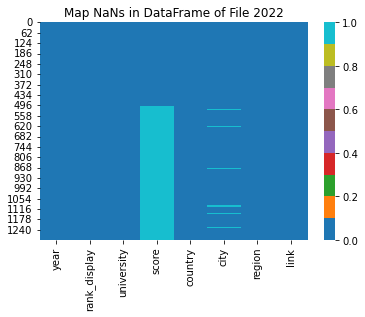

In [8]:
# Visualised the missing values columns
sns.heatmap(uni_rank_2022.isna(),cmap='tab10')
plt.title("Map NaNs in DataFrame of File 2022")

In [9]:
# Get information of all columns in the dataframe
uni_rank_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1300 non-null   int64  
 1   rank_display  1300 non-null   object 
 2   university    1300 non-null   object 
 3   score         501 non-null    float64
 4   country       1300 non-null   object 
 5   city          1251 non-null   object 
 6   region        1300 non-null   object 
 7   link          1300 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 81.4+ KB


## Transform data (cleanse) - Column: City

In [10]:
# Locate the position of the string that may contain city name in the university link
len("https://www.topuniversities.com/universities/")

45

In [11]:
# Extract the string that contains city name from the url and add to the dataframe as a new column
uni_rank_2022["city_extract"] = uni_rank_2022['link'].str[45:]
uni_rank_2022.head()

,year,rank_display,university,score,country,city,region,link,city_extract
0,2022,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America,https://www.topuniversities.com/universities/m...,massachusetts-institute-technology-mit
1,2022,2,University of Oxford,99.5,United Kingdom,Oxford,Europe,https://www.topuniversities.com/universities/u...,university-oxford
2,2022,=3,Stanford University,98.7,United States,Stanford,North America,https://www.topuniversities.com/universities/s...,stanford-university
3,2022,=3,University of Cambridge,98.7,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/universities/u...,university-cambridge
4,2022,5,Harvard University,98.0,United States,Cambridge,North America,https://www.topuniversities.com/universities/h...,harvard-university


In [12]:
# Drop the unwanted link column
uni_rank_2022 = uni_rank_2022.drop(["link"], axis=1)

# Locate the NaN value in the city column
uni_rank_2022[uni_rank_2022["city"].isnull()]

,year,rank_display,university,score,country,city,region,city_extract
43,2022,44,Université PSL,77.6,France,NaN,Europe,universite-psl
71,2022,72,Sorbonne University,67.1,France,NaN,Europe,sorbonne-university
86,2022,=86,Université Paris-Saclay,64.9,France,NaN,Europe,universite-paris-saclay
212,2022,212,Ulsan National Institute of Science and Techno...,42.4,South Korea,NaN,Asia,ulsan-national-institute-science-technology-unist
217,2022,=216,Queen's University Belfast,41.8,United Kingdom,NaN,Europe,queens-university-belfast
264,2022,=264,Kyung Hee University,37.2,South Korea,NaN,Asia,kyung-hee-university
268,2022,=268,National Yang Ming Chiao Tung University,36.9,Taiwan,NaN,Asia,national-yang-ming-chiao-tung-university
276,2022,=275,Southern University of Science and Technology,36.5,China (Mainland),NaN,Asia,southern-university-science-technology
325,2022,=322,University of Macau,32.9,Macau SAR,NaN,Asia,university-macau
351,2022,=351,Brunel University London,31.3,United Kingdom,NaN,Europe,brunel-university-london


In [13]:
# Count the NaN value in the city column
uni_rank_2022["city"].isnull().sum()

49

In [14]:
# Initialise a new list and copy over the data for the cleansing process
df = []
df = uni_rank_2022.copy()

In [15]:
# Split the city_extract column into multiple columns to get the city name
df["city_e1"] = df["city_extract"].str.split('-').str[0]
df["city_e2"] = df["city_extract"].str.split('-').str[1]
df["city_e3"] = df["city_extract"].str.split('-').str[2]
df["city_e4"] = df["city_extract"].str.split('-').str[3]
df["city_e5"] = df["city_extract"].str.split('-').str[4]
df["city_e6"] = df["city_extract"].str.split('-').str[5]
df[df["city"].isnull()]

,year,rank_display,university,score,country,city,region,city_extract,city_e1,city_e2,city_e3,city_e4,city_e5,city_e6
43,2022,44,Université PSL,77.6,France,NaN,Europe,universite-psl,universite,psl,NaN,NaN,NaN,NaN
71,2022,72,Sorbonne University,67.1,France,NaN,Europe,sorbonne-university,sorbonne,university,NaN,NaN,NaN,NaN
86,2022,=86,Université Paris-Saclay,64.9,France,NaN,Europe,universite-paris-saclay,universite,paris,saclay,NaN,NaN,NaN
212,2022,212,Ulsan National Institute of Science and Techno...,42.4,South Korea,NaN,Asia,ulsan-national-institute-science-technology-unist,ulsan,national,institute,science,technology,unist
217,2022,=216,Queen's University Belfast,41.8,United Kingdom,NaN,Europe,queens-university-belfast,queens,university,belfast,NaN,NaN,NaN
264,2022,=264,Kyung Hee University,37.2,South Korea,NaN,Asia,kyung-hee-university,kyung,hee,university,NaN,NaN,NaN
268,2022,=268,National Yang Ming Chiao Tung University,36.9,Taiwan,NaN,Asia,national-yang-ming-chiao-tung-university,national,yang,ming,chiao,tung,university
276,2022,=275,Southern University of Science and Technology,36.5,China (Mainland),NaN,Asia,southern-university-science-technology,southern,university,science,technology,NaN,NaN
325,2022,=322,University of Macau,32.9,Macau SAR,NaN,Asia,university-macau,university,macau,NaN,NaN,NaN,NaN
351,2022,=351,Brunel University London,31.3,United Kingdom,NaN,Europe,brunel-university-london,brunel,university,london,NaN,NaN,NaN


In [16]:
# Import data from worldcities csv file and convert it into list
world_cities = pd.read_csv("Resources/worldcities_cleaned.csv")
world_cities = world_cities["city_name"].to_list()

In [17]:
# Look up the value of each cell in the splitted columns of the city_extract vs the world_cities list
# Replace the university city name if it's found in the world_cities list
for i in range(len(df)):
    if (pd.isnull(df.loc[i, "city"])) and (df.loc[i, "city_e1"] in world_cities):
        df.loc[i, "city"] = df.loc[i, "city_e1"]
    elif (pd.isnull(df.loc[i, "city"])) and (df.loc[i, "city_e2"] in world_cities):
        df.loc[i, "city"] = df.loc[i, "city_e2"]
    elif (pd.isnull(df.loc[i, "city"])) and (df.loc[i, "city_e3"] in world_cities):
        df.loc[i, "city"] = df.loc[i, "city_e3"]
    elif (pd.isnull(df.loc[i, "city"])) and (df.loc[i, "city_e4"] in world_cities):
        df.loc[i, "city"] = df.loc[i, "city_e4"]
    elif (pd.isnull(df.loc[i, "city"])) and (df.loc[i, "city_e5"] in world_cities):
        df.loc[i, "city"] = df.loc[i, "city_e5"]
    elif (pd.isnull(df.loc[i, "city"])) and (df.loc[i, "city_e6"] in world_cities):
        df.loc[i, "city"] = df.loc[i, "city_e6"]


In [18]:
# Check whether there's any null values left in the city column
df["city"].isnull().sum()

14

In [19]:
(df[df["city"].isnull()])

,year,rank_display,university,score,country,city,region,city_extract,city_e1,city_e2,city_e3,city_e4,city_e5,city_e6
43,2022,44,Université PSL,77.6,France,NaN,Europe,universite-psl,universite,psl,NaN,NaN,NaN,NaN
71,2022,72,Sorbonne University,67.1,France,NaN,Europe,sorbonne-university,sorbonne,university,NaN,NaN,NaN,NaN
264,2022,=264,Kyung Hee University,37.2,South Korea,NaN,Asia,kyung-hee-university,kyung,hee,university,NaN,NaN,NaN
268,2022,=268,National Yang Ming Chiao Tung University,36.9,Taiwan,NaN,Asia,national-yang-ming-chiao-tung-university,national,yang,ming,chiao,tung,university
276,2022,=275,Southern University of Science and Technology,36.5,China (Mainland),NaN,Asia,southern-university-science-technology,southern,university,science,technology,NaN,NaN
749,2022,701-750,Université Côte d'Azur,NaN,France,NaN,Europe,universite-cote-dazur,universite,cote,dazur,NaN,NaN,NaN
763,2022,751-800,Jamia Millia Islamia,NaN,India,NaN,Asia,jamia-millia-islamia,jamia,millia,islamia,NaN,NaN,NaN
773,2022,751-800,Princess Nourah bint Abdulrahman University,NaN,Saudi Arabia,NaN,Asia,princess-nourah-bint-abdulrahman-university,princess,nourah,bint,abdulrahman,university,NaN
832,2022,801-1000,German Jordanian University,NaN,Jordan,NaN,Asia,german-jordanian-university,german,jordanian,university,NaN,NaN,NaN
1034,2022,1001-1200,Escuela Politécnica Nacional,NaN,Ecuador,NaN,Latin America,escuela-politecnica-nacional,escuela,politecnica,nacional,NaN,NaN,NaN


In [20]:
# Visit the university websites and look up the city names for country: South Korea, Singapore, Macau, China
df.loc[[43],"city"] = "Paris"
df.loc[[71],"city"] = "Paris"
df.loc[[264],"city"] = "Seoul, Suwon"
df.loc[[268],"city"] = "Hsinchu, Taipei"
df.loc[[276],"city"] = "Changsha"
df.loc[[749],"city"] = "Nice, Cannes, Menton, Grasse, Sophia Antipolis"
df.loc[[763],"city"] = "Delhi"
df.loc[[773],"city"] = "Riyadh"
df.loc[[832],"city"] = "Amman"
df.loc[[1034],"city"] = "Guayaquil, Guayas"
df.loc[[1100],"city"] = "Saint Petersburg"
df.loc[[1201],"city"] = "Taoyuan"
df.loc[[1240],"city"] = "Cluj-Napoca"
df.loc[[1249],"city"] = "Temuco, Talca, Santiago"
df["city"].isnull().sum()

0

In [21]:
# Check whether there is any NaN in the city column
(df[df["city"].isnull()])


,year,rank_display,university,score,country,city,region,city_extract,city_e1,city_e2,city_e3,city_e4,city_e5,city_e6


In [22]:
# Drop the unused columns
df = df.drop(["city_e1","city_e2","city_e3","city_e4","city_e5","city_e6","city_extract"], axis=1)
df.head()

,year,rank_display,university,score,country,city,region
0,2022,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America
1,2022,2,University of Oxford,99.5,United Kingdom,Oxford,Europe
2,2022,=3,Stanford University,98.7,United States,Stanford,North America
3,2022,=3,University of Cambridge,98.7,United Kingdom,Cambridge,Europe
4,2022,5,Harvard University,98.0,United States,Cambridge,North America


## Transform data (cleanse) - Column: Rank_Display & Score

In [23]:
# Split the unwanted characters, capture the ranking from the column rank_display and store the data in the new column
df["rank"] = df['rank_display'].str.split('-').str[0]
df["rank"] = df['rank_display'].str.split('+').str[0]
df.tail(10)

,year,rank_display,university,score,country,city,region,rank
1290,2022,1201+,University of Sarajevo,NaN,Bosnia and Herzegovina,Sarajevo,Europe,1201
1291,2022,1201+,University of Split,NaN,Croatia,Split,Europe,1201
1292,2022,1201+,Università degli studi di Bergamo,NaN,Italy,Bergamo,Europe,1201
1293,2022,1201+,Université Mohammed V de Rabat,NaN,Morocco,Rabat,Africa,1201
1294,2022,1201+,Université de Caen Normandie,NaN,France,Caen,Europe,1201
1295,2022,1201+,Université de Tunis,NaN,Tunisia,Tunis,Africa,1201
1296,2022,1201+,Université de Tunis El Manar,NaN,Tunisia,Tunis,Africa,1201
1297,2022,1201+,Yarmouk University,NaN,Jordan,Irbid,Asia,1201
1298,2022,1201+,Yildiz Technical University,NaN,Turkey,Istanbul,Asia,1201
1299,2022,1201+,Zagazig University,NaN,Egypt,Zagazig,Africa,1201


In [24]:
# Check whether the column rank contains any unwanted characters
df[df["rank"].str.match('^=.*')==True]

,year,rank_display,university,score,country,city,region,rank
2,2022,=3,Stanford University,98.7,United States,Stanford,North America,=3
3,2022,=3,University of Cambridge,98.7,United Kingdom,Cambridge,Europe,=3
7,2022,=8,ETH Zurich - Swiss Federal Institute of Techno...,95.4,Switzerland,Zürich,Europe,=8
8,2022,=8,UCL,95.4,United Kingdom,London,Europe,=8
13,2022,=14,EPFL,90.2,Switzerland,Lausanne,Europe,=14
...,...,...,...,...,...,...,...,...
496,2022,=494,Dongguk University,24.1,South Korea,Seoul,Asia,=494
497,2022,=494,Iowa State University,24.1,United States,Ames,North America,=494
498,2022,=494,Sogang University,24.1,South Korea,Seoul,Asia,=494
499,2022,=494,"University of Rome ""Tor Vergata""",24.1,Italy,Rome,Europe,=494


In [25]:
# Remove all the unwanted characters
df["rank"].replace("=",'',regex=True, inplace=True)
df["rank"] = df['rank'].str.split('-').str[0]

# Check whether all the unwanted characters had been removed
df[df["rank"].str.match('^=.*')==True]

,year,rank_display,university,score,country,city,region,rank


In [26]:
# Fill all NaN values with 0 (zero)
df["score"] =  df["score"].fillna(0)
df["rank_display"] = df["rank_display"].fillna(0)
df["rank"] = df["rank"].fillna(0)

# Check to see whether there is any NaN value left in the dataframe
df.isnull().sum()

year            0
rank_display    0
university      0
score           0
country         0
city            0
region          0
rank            0
dtype: int64

In [27]:
# Convert the column rank to integer
df["rank"] = pd.to_numeric(df["rank"])

In [28]:
# Set index column as table "id" column
df.reset_index(drop=True,inplace=True)
df['id'] = df.index
df.set_index("id")

,year,rank_display,university,score,country,city,region,rank
id,,,,,,,,
0,2022,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America,1
1,2022,2,University of Oxford,99.5,United Kingdom,Oxford,Europe,2
2,2022,=3,Stanford University,98.7,United States,Stanford,North America,3
3,2022,=3,University of Cambridge,98.7,United Kingdom,Cambridge,Europe,3
4,2022,5,Harvard University,98.0,United States,Cambridge,North America,5
...,...,...,...,...,...,...,...,...
1295,2022,1201+,Université de Tunis,0.0,Tunisia,Tunis,Africa,1201
1296,2022,1201+,Université de Tunis El Manar,0.0,Tunisia,Tunis,Africa,1201
1297,2022,1201+,Yarmouk University,0.0,Jordan,Irbid,Asia,1201


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1300 non-null   int64  
 1   rank_display  1300 non-null   object 
 2   university    1300 non-null   object 
 3   score         1300 non-null   float64
 4   country       1300 non-null   object 
 5   city          1300 non-null   object 
 6   region        1300 non-null   object 
 7   rank          1300 non-null   int64  
 8   id            1300 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 91.5+ KB


## Transform data - Finalise DataFrames

In [30]:
uni_rank_transformed = []
uni_rank_transformed = df[["id","year","rank","score"]].copy()
uni_rank_transformed.set_index("id",drop=True, inplace=True)
uni_rank_transformed.head()

,year,rank,score
id,,,
0,2022,1,100.0
1,2022,2,99.5
2,2022,3,98.7
3,2022,3,98.7
4,2022,5,98.0


In [31]:
uni_details_transformed = []
uni_details_transformed = df[["id","university","city","country","region"]].copy()
uni_details_transformed.set_index("id",drop=True, inplace=True)
uni_details_transformed.head()

,university,city,country,region
id,,,,
0,Massachusetts Institute of Technology (MIT),Cambridge,United States,North America
1,University of Oxford,Oxford,United Kingdom,Europe
2,Stanford University,Stanford,United States,North America
3,University of Cambridge,Cambridge,United Kingdom,Europe
4,Harvard University,Cambridge,United States,North America


## Create postgresql database connection

In [32]:
connection_string = "postgres:password@localhost:5432/QS_Uni_Ranking_db"
engine = create_engine(f'postgresql://{connection_string}')

In [33]:
# Confirm tables creation in pgAdmin4
engine.table_names()

['uni_rank']

## Load pandas DataFrames into database

In [34]:
uni_rank_transformed.to_sql(name='uni_rank', con=engine, if_exists='append', index=True)

In [35]:
uni_details_transformed.to_sql(name='uni_details', con=engine, if_exists='append', index=True)